In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/apple/Desktop/bank-case/data.csv')

In [3]:
df.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0


In [4]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Credit_Limit
False    30602
Name: Credit_Limit, dtype: int64

Sex
False    30601
True         1
Name: Sex, dtype: int64

Education
False    30599
True         3
Name: Education, dtype: int64

Marital_Status
False    30598
True         4
Name: Marital_Status, dtype: int64

Age
False    30595
True         7
Name: Age, dtype: int64

Jan_Repay_Status
False    30597
True         5
Name: Jan_Repay_Status, dtype: int64

Previous_Payment_Prior_Jan
False    30599
True         3
Name: Previous_Payment_Prior_Jan, dtype: int64

Jan_Statement
False    30595
True         7
Name: Jan_Statement, dtype: int64

Feb_Repay_Status
False    30600
True         2
Name: Feb_Repay_Status, dtype: int64

Previous_Payment_Prior_Feb
False    30597
True         5
Name: Previous_Payment_Prior_Feb, dtype: int64

Feb_Statement
False    30595
True         7
Name: Feb_Statement, dtype: int64

Mar_Repay_Status
False    30599
True         3
Name: Mar_Repay_Status, dtype: int64

Previous_Payment_Prior_Mar
False    30600
Tru

In [5]:
df['Sex'].replace(np.nan,3,inplace = True)

In [6]:
df['Sex'].value_counts()

2.0    18308
1.0    12110
0.0      113
3.0       47
4.0       14
7.0        3
5.0        3
6.0        3
8.0        1
Name: Sex, dtype: int64

In [7]:
df['Sex'].replace(0.0,3.0,inplace = True)
df['Sex'].replace(4.0,3.0,inplace = True)
df['Sex'].replace(5.0,3.0,inplace = True)
df['Sex'].replace(6.0,3.0,inplace = True)
df['Sex'].replace(7.0,3.0,inplace = True)
df['Sex'].replace(8.0,3.0,inplace = True)
df['Sex'].value_counts()

2.0    18308
1.0    12110
3.0      184
Name: Sex, dtype: int64

In [8]:
#df = df[df['Sex'] != 3]
#df['Sex'].value_counts()

In [9]:
df['Education'].replace(np.nan,5,inplace = True)
df['Education'].value_counts()

2.0    14163
1.0    10711
3.0     5060
5.0      372
4.0      231
6.0       51
0.0       14
Name: Education, dtype: int64

In [10]:
df['Education'].replace(0.0,5.0,inplace = True)
df['Education'].replace(6.0,5.0,inplace = True)
df['Education'].value_counts()

2.0    14163
1.0    10711
3.0     5060
5.0      437
4.0      231
Name: Education, dtype: int64

In [11]:
df['Marital_Status'].replace(np.nan,4,inplace = True)
df['Marital_Status'].value_counts()

2.0    16178
1.0    13855
3.0      503
0.0       54
4.0       12
Name: Marital_Status, dtype: int64

In [12]:
df['Marital_Status'].replace(0.0,4.0,inplace = True)
df['Marital_Status'].value_counts()

2.0    16178
1.0    13855
3.0      503
4.0       66
Name: Marital_Status, dtype: int64

In [13]:
avg_Age = df['Age'].mean(axis=0)
df['Age'].replace(np.nan, avg_Age, inplace = True)
df['Age'].value_counts()

29.0     1409
27.0     1407
28.0     1393
31.0     1373
30.0     1360
         ... 
17.0        3
100.0       2
102.0       2
101.0       1
14.0        1
Name: Age, Length: 89, dtype: int64

In [14]:
# minimum age to get a credit card 18
# life expectancy 81.7 - based on Statistics Canada, but in order to binning,so we assume maxmium age 81

df = df[df['Age'] >= 18]
df = df[df['Age'] <= 81] 
df['Age'].value_counts() 

#delete Age < 18 and Age > 81

29.0    1409
27.0    1407
28.0    1393
31.0    1373
30.0    1360
        ... 
79.0       5
75.0       4
78.0       4
76.0       4
80.0       3
Name: Age, Length: 65, dtype: int64

In [15]:
#df.dropna(subset = ['Jan_Repay_Status'], axis = 0, inplace = True)
#df.dropna(subset = ['Previous_Payment_Prior_Jan'], axis = 0, inplace = True)
#df.dropna(subset = ['Jan_Statement'], axis = 0, inplace = True)

#df.dropna(subset = ['Feb_Repay_Status'], axis = 0, inplace = True)
#df.dropna(subset = ['Previous_Payment_Prior_Feb'], axis = 0, inplace = True)
#df.dropna(subset = ['Feb_Statement'], axis = 0, inplace = True)

#df.dropna(subset = ['Mar_Repay_Status'], axis = 0, inplace = True)
#df.dropna(subset = ['Previous_Payment_Prior_Mar'], axis = 0, inplace = True)
#df.dropna(subset = ['Mar_Statement'], axis = 0, inplace = True)

#df.dropna(subset = ['Apr_Repay_Status'], axis = 0, inplace = True)
#df.dropna(subset = ['Previous_Payment_Prior_Apr'], axis = 0, inplace = True)
#df.dropna(subset = ['Apr_Statement'], axis = 0, inplace = True)

#df.dropna(subset = ['May_Repay_Status'], axis = 0, inplace = True)
#df.dropna(subset = ['Previous_Payment_Prior_May'], axis = 0, inplace = True)
#df.dropna(subset = ['May_Statement'], axis = 0, inplace = True)

#df.dropna(subset = ['Jun_Repay_Status'], axis = 0, inplace = True)
#df.dropna(subset = ['Previous_Payment_Prior_Jun'], axis = 0, inplace = True)
#df.dropna(subset = ['Jun_Statement'], axis = 0, inplace = True)

#df.dropna(subset = ['July_Payment_Status'], axis = 0, inplace = True)

In [16]:
df['Jan_Repay_Status'].value_counts()

 0.0     14812
-1.0      5733
 1.0      3726
-2.0      2766
 2.0      2708
 3.0       355
 4.0       105
 8.0        53
 5.0        51
 7.0        36
 6.0        36
 10.0       26
 9.0        24
 12.0       24
 11.0       22
Name: Jan_Repay_Status, dtype: int64

In [17]:
df['Jan_Repay_Status'].replace(-1.0,0.0,inplace = True)
df['Jan_Repay_Status'].replace(-2.0,0.0,inplace = True)

In [18]:
df['Jan_Repay_Status'].value_counts() 

0.0     23311
1.0      3726
2.0      2708
3.0       355
4.0       105
8.0        53
5.0        51
7.0        36
6.0        36
10.0       26
9.0        24
12.0       24
11.0       22
Name: Jan_Repay_Status, dtype: int64

In [19]:
df['Feb_Repay_Status'].value_counts() 

 0.0     15811
-1.0      6095
 2.0      3959
-2.0      3795
 3.0       362
 4.0       133
 1.0        57
 7.0        53
 5.0        46
 6.0        39
 12.0       29
 8.0        29
 10.0       25
 11.0       24
 9.0        24
Name: Feb_Repay_Status, dtype: int64

In [20]:
df['Feb_Repay_Status'].replace(-1.0,0.0,inplace = True)
df['Feb_Repay_Status'].replace(-2.0,0.0,inplace = True)
df['Feb_Repay_Status'].value_counts() 

0.0     25701
2.0      3959
3.0       362
4.0       133
1.0        57
7.0        53
5.0        46
6.0        39
12.0       29
8.0        29
10.0       25
11.0       24
9.0        24
Name: Feb_Repay_Status, dtype: int64

In [21]:
df['Mar_Repay_Status'].value_counts() 

 0.0     15857
-1.0      5984
-2.0      4100
 2.0      3862
 3.0       259
 4.0       100
 7.0        55
 6.0        53
 5.0        48
 8.0        30
 9.0        29
 12.0       28
 1.0        27
 11.0       26
 10.0       21
Name: Mar_Repay_Status, dtype: int64

In [22]:
df['Mar_Repay_Status'].replace(-1.0,0.0,inplace = True)
df['Mar_Repay_Status'].replace(-2.0,0.0,inplace = True)
df['Mar_Repay_Status'].value_counts() 

0.0     25941
2.0      3862
3.0       259
4.0       100
7.0        55
6.0        53
5.0        48
8.0        30
9.0        29
12.0       28
1.0        27
11.0       26
10.0       21
Name: Mar_Repay_Status, dtype: int64

In [23]:
df['Apr_Repay_Status'].value_counts() 

 0.0     16537
-1.0      5727
-2.0      4360
 2.0      3194
 3.0       208
 4.0        97
 7.0        80
 5.0        64
 9.0        39
 11.0       32
 6.0        32
 8.0        31
 12.0       30
 1.0        25
 10.0       23
Name: Apr_Repay_Status, dtype: int64

In [24]:
df['Apr_Repay_Status'].replace(-1.0,0.0,inplace = True)
df['Apr_Repay_Status'].replace(-2.0,0.0,inplace = True)
df['Apr_Repay_Status'].value_counts() 

0.0     26624
2.0      3194
3.0       208
4.0        97
7.0        80
5.0        64
9.0        39
11.0       32
6.0        32
8.0        31
12.0       30
1.0        25
10.0       23
Name: Apr_Repay_Status, dtype: int64

In [25]:
df['May_Repay_Status'].value_counts() 

 0.0     17029
-1.0      5581
-2.0      4561
 2.0      2666
 3.0       203
 4.0       107
 7.0        85
 5.0        50
 9.0        33
 11.0       31
 1.0        31
 10.0       27
 6.0        27
 12.0       27
 8.0        24
Name: May_Repay_Status, dtype: int64

In [26]:
df['May_Repay_Status'].replace(-1.0,0.0,inplace = True)
df['May_Repay_Status'].replace(-2.0,0.0,inplace = True)
df['May_Repay_Status'].value_counts() 

0.0     27171
2.0      2666
3.0       203
4.0       107
7.0        85
5.0        50
9.0        33
11.0       31
1.0        31
10.0       27
6.0        27
12.0       27
8.0        24
Name: May_Repay_Status, dtype: int64

In [27]:
df['Jun_Repay_Status'].value_counts() 

 0.0     16374
-1.0      5790
-2.0      4910
 2.0      2800
 3.0       223
 4.0        73
 7.0        69
 6.0        39
 5.0        36
 8.0        35
 11.0       34
 9.0        30
 12.0       27
 10.0       20
 1.0        20
Name: Jun_Repay_Status, dtype: int64

In [28]:
df['Jun_Repay_Status'].replace(-1.0,0.0,inplace = True)
df['Jun_Repay_Status'].replace(-2.0,0.0,inplace = True)
df['Jun_Repay_Status'].value_counts() 

0.0     27074
2.0      2800
3.0       223
4.0        73
7.0        69
6.0        39
5.0        36
8.0        35
11.0       34
9.0        30
12.0       27
10.0       20
1.0        20
Name: Jun_Repay_Status, dtype: int64

In [29]:
df['July_Payment_Status'].value_counts()

0.0    23642
1.0     6838
2.0        2
Name: July_Payment_Status, dtype: int64

In [30]:
df = df[df['July_Payment_Status'] != 2] 
df['July_Payment_Status'].value_counts()

0.0    23642
1.0     6838
Name: July_Payment_Status, dtype: int64

In [31]:
# Data standardization
df['Previous_Payment_Prior_Jan'] = df['Previous_Payment_Prior_Jan']/df['Jan_Statement']
df['Previous_Payment_Prior_Feb'] = df['Previous_Payment_Prior_Feb']/df['Feb_Statement']
df['Previous_Payment_Prior_Mar'] = df['Previous_Payment_Prior_Mar']/df['Mar_Statement']
df['Previous_Payment_Prior_Apr'] = df['Previous_Payment_Prior_Apr']/df['Apr_Statement']
df['Previous_Payment_Prior_May'] = df['Previous_Payment_Prior_May']/df['May_Statement']
df['Previous_Payment_Prior_Jun'] = df['Previous_Payment_Prior_Jun']/df['Jun_Statement']

In [32]:
df['Jan_Statement'] = df['Jan_Statement']/df['Credit_Limit']
df['Feb_Statement'] = df['Feb_Statement']/df['Credit_Limit']
df['Mar_Statement'] = df['Mar_Statement']/df['Credit_Limit']
df['Apr_Statement'] = df['Apr_Statement']/df['Credit_Limit']
df['May_Statement'] = df['May_Statement']/df['Credit_Limit']
df['Jun_Statement'] = df['Jun_Statement']/df['Credit_Limit']

In [33]:
df['Previous_Payment_Prior_Jan'] =df['Previous_Payment_Prior_Jan'].replace(np.nan,0.0)
df['Previous_Payment_Prior_Feb'] =df['Previous_Payment_Prior_Feb'].replace(np.nan,0.0)
df['Previous_Payment_Prior_Mar'] =df['Previous_Payment_Prior_Mar'].replace(np.nan,0.0)
df['Previous_Payment_Prior_Apr'] =df['Previous_Payment_Prior_Apr'].replace(np.nan,0.0)
df['Previous_Payment_Prior_May'] =df['Previous_Payment_Prior_May'].replace(np.nan,0.0)
df['Previous_Payment_Prior_Jun'] =df['Previous_Payment_Prior_Jun'].replace(np.nan,0.0)

In [34]:
df['Previous_Payment_Prior_Jan'] =df['Previous_Payment_Prior_Jan'].replace(np.inf,0.0)
df['Previous_Payment_Prior_Feb'] =df['Previous_Payment_Prior_Feb'].replace(np.inf,0.0)
df['Previous_Payment_Prior_Mar'] =df['Previous_Payment_Prior_Mar'].replace(np.inf,0.0)
df['Previous_Payment_Prior_Apr'] =df['Previous_Payment_Prior_Apr'].replace(np.inf,0.0)
df['Previous_Payment_Prior_May'] =df['Previous_Payment_Prior_May'].replace(np.inf,0.0)
df['Previous_Payment_Prior_Jun'] =df['Previous_Payment_Prior_Jun'].replace(np.inf,0.0)

In [36]:
df['Jan_Statement'] =df['Jan_Statement'].replace(np.nan,0.0)
df['Feb_Statement'] =df['Feb_Statement'].replace(np.nan,0.0)
df['Mar_Statement'] =df['Previous_Payment_Prior_Mar'].replace(np.nan,0.0)
df['Apr_Statement'] =df['Apr_Statement'].replace(np.nan,0.0)
df['May_Statement'] =df['May_Statement'].replace(np.nan,0.0)
df['Jun_Statement'] =df['Jun_Statement'].replace(np.nan,0.0)

In [37]:
df['Jan_Statement'] =df['Jan_Statement'].replace(np.inf,0.0)
df['Feb_Statement'] =df['Feb_Statement'].replace(np.inf,0.0)
df['Mar_Statement'] =df['Mar_Statement'].replace(np.inf,0.0)
df['Apr_Statement'] =df['Apr_Statement'].replace(np.inf,0.0)
df['May_Statement'] =df['May_Statement'].replace(np.inf,0.0)
df['Jun_Statement'] =df['Jun_Statement'].replace(np.inf,0.0)

In [38]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Credit_Limit
False    30480
Name: Credit_Limit, dtype: int64

Sex
False    30480
Name: Sex, dtype: int64

Education
False    30480
Name: Education, dtype: int64

Marital_Status
False    30480
Name: Marital_Status, dtype: int64

Age
False    30480
Name: Age, dtype: int64

Jan_Repay_Status
False    30475
True         5
Name: Jan_Repay_Status, dtype: int64

Previous_Payment_Prior_Jan
False    30480
Name: Previous_Payment_Prior_Jan, dtype: int64

Jan_Statement
False    30480
Name: Jan_Statement, dtype: int64

Feb_Repay_Status
False    30479
True         1
Name: Feb_Repay_Status, dtype: int64

Previous_Payment_Prior_Feb
False    30480
Name: Previous_Payment_Prior_Feb, dtype: int64

Feb_Statement
False    30480
Name: Feb_Statement, dtype: int64

Mar_Repay_Status
False    30477
True         3
Name: Mar_Repay_Status, dtype: int64

Previous_Payment_Prior_Mar
False    30480
Name: Previous_Payment_Prior_Mar, dtype: int64

Mar_Statement
False    30480
Name: Mar_Statement, dtype: int64

Apr_Repay_S

In [39]:
df.to_csv(('/Users/apple/Desktop/bank-case/data-cleaned.csv'))

In [41]:
df.corr()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
Credit_Limit,1.000000,0.021475,-0.216040,-0.111930,0.131430,-0.141219,0.002750,-0.369580,-0.163719,0.001776,...,-0.147535,-0.002030,-0.355509,-0.137151,0.009542,-0.341286,-0.134075,0.008305,-0.323812,-0.154173
Sex,0.021475,1.000000,0.027047,-0.019875,-0.071442,0.022310,-0.004834,-0.075848,0.017143,0.006084,...,0.027667,0.005182,-0.056703,0.030743,-0.005078,-0.046636,0.025833,0.005625,-0.039117,-0.032921
Education,-0.216040,0.027047,1.000000,-0.103385,0.189366,0.127529,-0.005579,0.178301,0.127855,-0.000979,...,0.128155,0.003636,0.149756,0.115757,-0.001338,0.137525,0.107166,0.001782,0.126097,0.036928
Marital_Status,-0.111930,-0.019875,-0.103385,1.000000,-0.360933,0.050242,-0.006578,0.043481,0.047917,0.011121,...,0.063223,0.005200,0.046816,0.068018,-0.004346,0.043829,0.070708,-0.002859,0.043607,-0.017868
Age,0.131430,-0.071442,0.189366,-0.360933,1.000000,0.076770,0.004603,-0.022835,0.078351,-0.010388,...,0.082227,-0.003700,-0.037781,0.075816,0.003397,-0.037792,0.073244,0.006246,-0.037689,0.024290
Jan_Repay_Status,-0.141219,0.022310,0.127529,0.050242,0.076770,1.000000,-0.011809,0.107944,0.674411,0.000346,...,0.574836,-0.003238,0.150563,0.528901,-0.002926,0.167838,0.499735,-0.001873,0.176892,0.322656
Previous_Payment_Prior_Jan,0.002750,-0.004834,-0.005579,-0.006578,0.004603,-0.011809,1.000000,-0.004377,-0.001264,0.000050,...,-0.000119,0.000446,0.003333,0.000070,0.002478,-0.000285,0.000179,0.001431,-0.002183,0.003003
Jan_Statement,-0.369580,-0.075848,0.178301,0.043481,-0.022835,0.107944,-0.004377,1.000000,0.140691,-0.002985,...,0.072508,0.004604,0.793265,0.070565,-0.020801,0.735232,0.064186,-0.013000,0.688890,0.085898
Feb_Repay_Status,-0.163719,0.017143,0.127855,0.047917,0.078351,0.674411,-0.001264,0.140691,1.000000,0.002470,...,0.589128,-0.000864,0.184901,0.534520,-0.000007,0.199247,0.518180,-0.002313,0.206323,0.277689
Previous_Payment_Prior_Feb,0.001776,0.006084,-0.000979,0.011121,-0.010388,0.000346,0.000050,-0.002985,0.002470,1.000000,...,-0.000306,0.000616,-0.001119,-0.000373,-0.012730,-0.000178,-0.000100,-0.000938,-0.009920,0.000498


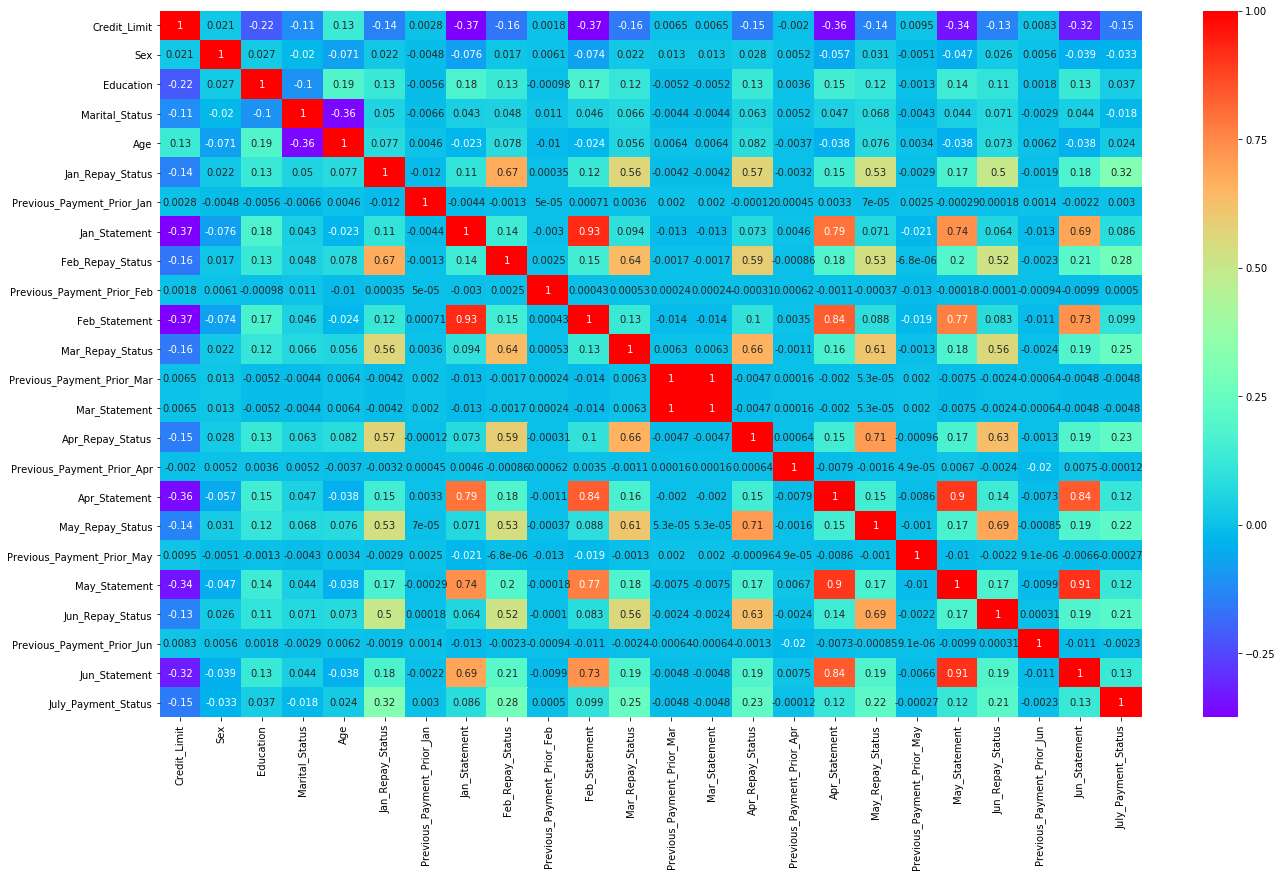

In [43]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure(figsize=(22,13))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(corr,annot = True, cmap='rainbow',ax=ax1)